In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
auto = pd.read_csv('automobile.txt', delimiter=',')

In [3]:
pd.set_option('display.max_columns', None)#lets how all the columns for the data when printing the df

In [4]:
auto.shape

(205, 26)

There is 205 rows and 26 columns in the dataframe.

In [5]:
auto.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

There seems to be no null or nan values in the dataset.

In [7]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now, from the head function we can see that there are '?' values in the dataset. Which is why the numerical column "normalized-losses" is an object and not an int dtype.

In [9]:
'?' in auto['normalized-losses'].unique() #this code checks if there are any ? values in the column. Now for this column we know there is ? values. But we will use it again later for the columns we are unsure about. 
#False is returned so we know that there is ? values in this column.

True

Now, lets replace the ? values in the normalized-losses column.

In [10]:
norm_mean = round(auto['normalized-losses'].loc[auto['normalized-losses'] != '?'].astype(int).mean())#find the average of the column excluding the ? values. 
auto['normalized-losses'] = auto['normalized-losses'].replace('?', norm_mean).astype('int64')
#As we can see from the output below the ?s in normalized-losses has been replaced with the mean.
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Now lets check if horsepower has ? values.

In [11]:
'?' in auto['horsepower'].unique()

True

Lets replace all the ?s in this column with the mean of horsepower.

In [12]:
horse_mean = round(auto['horsepower'].loc[auto['horsepower'] != '?'].astype(int).mean())
auto['horsepower'] = auto['horsepower'].replace('?', horse_mean).astype('int64')

In [13]:
'?' in auto['horsepower'].unique()

C:\Users\Matth\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


False

False is now returned. So we know that all the ?s have been updated with the mean. Lets see if the price column has any ?s

In [14]:
'?' in auto['price'].unique()

True

Now, lets tidy up price.

In [15]:
price_mean = round(auto['price'].loc[auto['price'] != '?'].astype(int).mean())
auto['price'] = auto['price'].replace('?', price_mean).astype('int64')

In [16]:
auto.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

We are getting somewhere however, we can see from the output above that there are still a few columns we need to change the dtype for.

In [17]:
auto[["bore", "stroke", "peak-rpm"]] = auto[["bore", "stroke", "peak-rpm"]].apply(pd.to_numeric ,errors='coerce')#apply numeric dtype to the columns 

In [18]:
auto.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

All edited columns now have the desired dtype. Now, lets move onto the data stories and visualizations. 

# Data Visualization Section

What is the most popular manufacturer in the dataset?

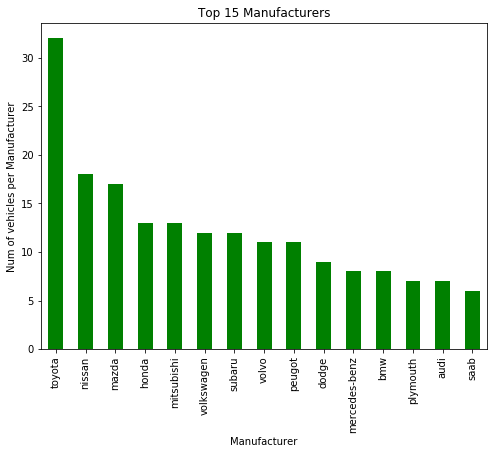

In [42]:
make_num = auto.make.value_counts().nlargest(15)
make_num.plot(kind='bar', figsize=(8,6), color='green')
plt.title('Top 15 Manufacturers')
plt.ylabel('Num of vehicles per Manufacturer')
plt.xlabel('Manufacturer');

From the visualisation above we can see that Toyota has the most vehicles in the dataset.

Is gas or diesel more popular?

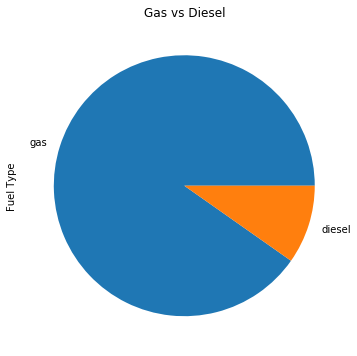

In [20]:
gas_vs_diesel = auto['fuel-type'].value_counts()
gas_vs_diesel.plot(kind='pie', figsize=(8,6))
plt.title('Gas vs Diesel')
plt.ylabel('Fuel Type');

The pie chart tells us that gas far out weighs diesel vehicles in the dataset.

Is there a correlation between engine size and horsepower?

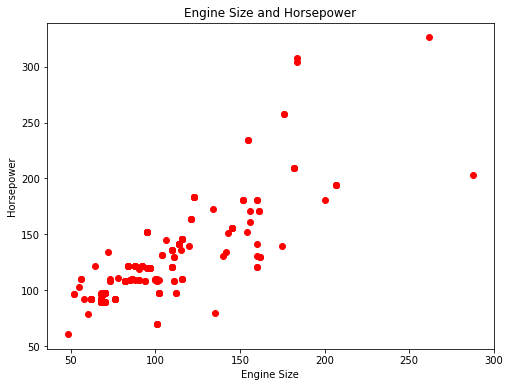

In [43]:
y = auto['engine-size'];
x = auto['horsepower']
plt.figure(figsize=(8,6))
plt.xlabel("Engine Size"); plt.ylabel("Horsepower"); plt.title("Engine Size and Horsepower");
plt.scatter(x,y, color="red");

There is a positive correlation between engine size and horsepower. 

Is there a correlation between the price of a car and its fuel efficiency?

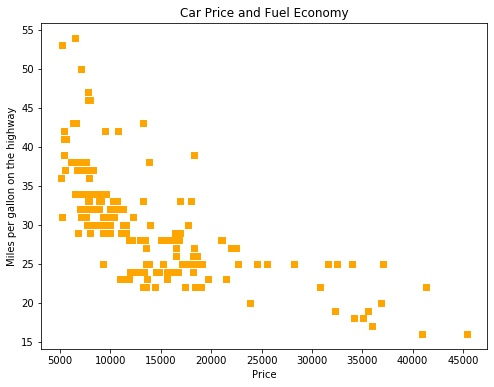

In [44]:
x = auto['price']
y = auto['highway-mpg']

plt.figure(figsize=(8,6))
plt.scatter(x, y, marker='s',color='orange')
plt.xlabel("Price")
plt.ylabel("Miles per gallon on the highway")
plt.title("Car Price and Fuel Economy");

There is a negative correlation between price and mpg on the highway. Meaning the more you pay for a car the more you have to pay for petrol. 

What is the most popular fwd, rwd or awd?

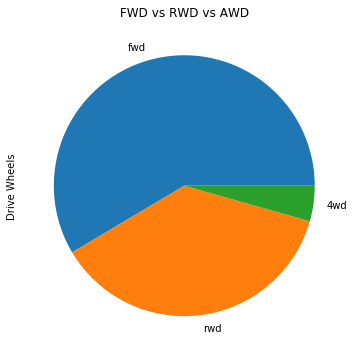

In [23]:
drive_type = auto['drive-wheels'].value_counts()
drive_type.plot(kind='pie', figsize=(8,6))
plt.title('FWD vs RWD vs AWD')
plt.ylabel('Drive Wheels');

Front wheel drive cars are the most popular in the dataset followed by rear wheel drive cars and then finally all wheel drive cars.

What is the relationship between curb height (the cars size) and fuel efficiency on the highway?

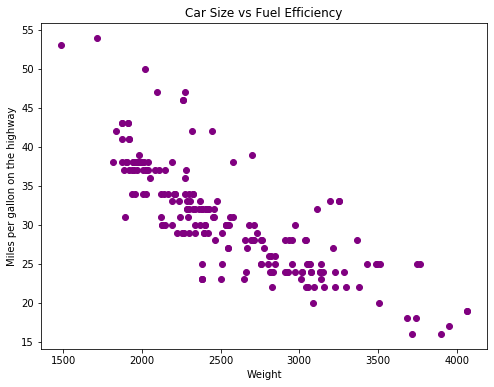

In [45]:
x = auto['curb-weight']
y = auto['highway-mpg']

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='purple')
plt.xlabel("Weight")
plt.ylabel("Miles per gallon on the highway")
plt.title("Car Size vs Fuel Efficiency");

There is a clear negative correlation between MPG on the highway and curb weight.